In [27]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

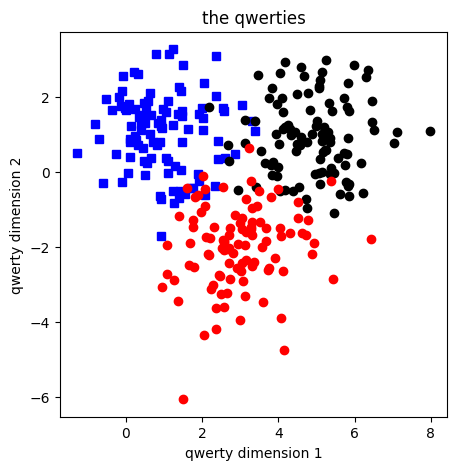

In [28]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]
C = [3,-2]

a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]
c = [C[0] + np.random.randn(nPerClust)*blur, C[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1)), 1+np.ones((nPerClust, 1))))

data_np = np.hstack((a,b,c)).T

data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.plot(data[np.where(labels==2)[0], 0], data[np.where(labels==2)[0], 1], 'ro')
plt.title('the qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [29]:
model = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Softmax(dim=1),
)

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [30]:
numEpochs = 1000
losses = torch.zeros(numEpochs)
accArr = []

for i in range(numEpochs):
    yHat = model(data)

    loss = lossfun(yHat, labels)
    losses[i] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches = torch.argmax(yHat, axis=1) == labels
    matchesNumeric = matches.float()
    accuracyPct = 100*torch.mean(matchesNumeric)
    accArr.append(accuracyPct)

predictions = model(data)

predlabels = torch.argmax(predictions, axis=1)
totalacc = 100*torch.mean((predlabels==labels).float())

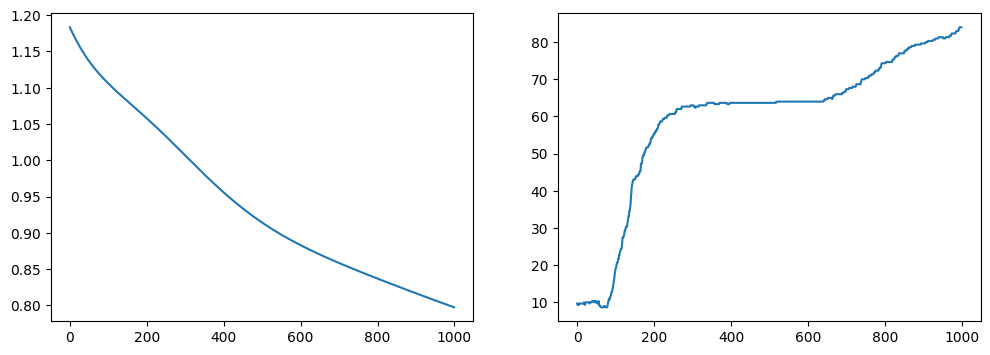

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(losses.detach())

ax[1].plot(accArr)

plt.show()

In [32]:
sm = nn.Softmax(1)
torch.sum(sm(yHat), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

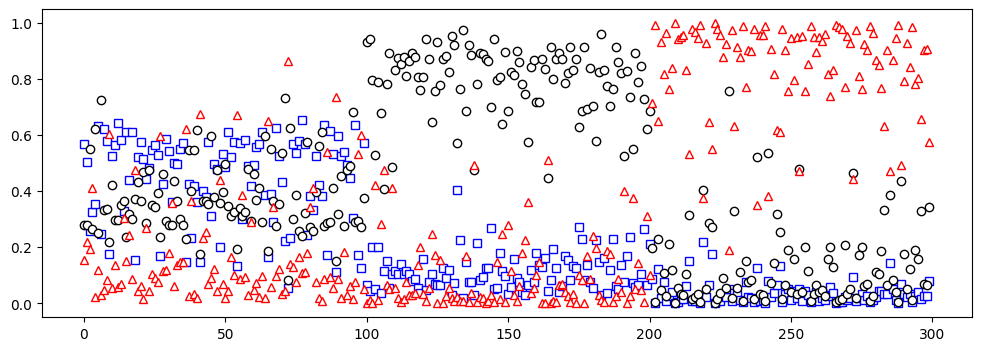

In [36]:
fig = plt.figure(figsize=(12,4))

colorshape = ['bs', 'ko', 'r^']
for i in range(3):
    plt.plot(yHat[:, i].detach(), colorshape[i], markerfacecolor = 'w')
plt.show()